# MA5790 - Assignment 6 - MM15B022 - R Mythreyi

In [1]:
%load_ext tikzmagic

The tikzmagic module is not an IPython extension.


In [2]:
%matplotlib inline

In [3]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## Question 1

Derivation of entries of $N \times N$ differentiation matrix.

### Solution

Given:
$$
p_{j}(x)=\frac{1}{a_{j}} \prod_{k=0 \atop k \neq j}^{N}\left(x-x_{k}\right) \text{, where } a_{j}=\prod_{k=0 \atop k \neq j}^{N}\left(x_{j}-x_{k}\right)
$$

Taking log on both sides, we get:
$$
\log p_{j}(x) = \sum_{k=0 \atop k \neq j}^{N} \log\left(x-x_{k}\right)- \log a_j \\
$$

Differentiating w.r.t $x$ on both sides, we get:
$$
\frac{p'_{j}(x)}{ p_{j}(x)} = \sum_{k=0 \atop k \neq j}^{N} \left(x-x_{k}\right)^{-1}+ 0 \\
$$

Therefore,
$$
p'_{j}(x)  = p_{j}(x) \sum_{k=0 \atop k \neq j}^{N} \left(x-x_{k}\right)^{-1}
$$

We know that:
$$
D_{ij} = p'_{j}(x_i)
$$

Therefore, for the diagonal entries:
$$
D_{jj} = p'_{j}(x_j) = p_{j}(x_j) \sum_{k=0 \atop k \neq j}^{N} \left(x_j-x_{k}\right)^{-1} 
$$

Since $p_{j}(x_j)=1$, we get:
$$
D_{jj} = \sum_{k=0 \atop k \neq j}^{N} \left(x_j-x_{k}\right)^{-1}
$$

For the off-diagonal entries, consider:
$$
D_{ij} = p'_{j}(x_i) = p_{j}(x_i) \sum_{k=0 \atop k \neq j}^{N} \left(x_i-x_{k}\right)^{-1} 
$$

But, 
$$
p_{j}(x_i) = \frac{1}{a_j} \prod_{k=0 \atop k \neq j}^{N}\left(x_i-x_{k}\right) 
$$

Therefore,
$$
D_{ij} = \frac{1}{a_j} \prod_{k=0 \atop k \neq j}^{N}\left(x_i-x_{k}\right) \sum_{k=0 \atop k \neq j}^{N} \left(x_i-x_{k}\right)^{-1} \\
=  \frac{1}{a_j (x_i - x_j)}  \sum_{k=0 \atop k \neq j}^{N} \frac{1}{\left(x_i-x_{k}\right)} \prod_{k=0}^{N}\left(x_i-x_{k}\right)
$$

The product term inside the sum has $(x_i - x_i)$ term making it zero. However, when the denominator is also $(x_i - x_i)$, it cancels out, leaving all the remaining products in the numerator. Hence, from definition of $a_i$
$$
D_{ij} =  \frac{1}{a_j (x_i - x_j)}  \prod_{k=0 \atop k \neq i }^{N}\left(x_i-x_{k}\right) = \frac{a_i}{a_j (x_i - x_j)}
$$

Hence Proved.

## Question 2

Deriving entries of Chebyshev Differentiation Matrix.

### Solution

We are interpolating on the Chebyshev nodes, given by:

$$ x_j = \cos \left(\frac{j \pi}{N} \right) \quad j=\{0,1,\cdots,N\}$$

To obtain the entries of the Differentiation Matrix, we can use the relations derived above (Question 1). We get the following results from simplifications using trigonometric identities:
$$
D_{00} = \sum_{k=0 \atop k \neq 0}^{N} \left(x_0-x_{k}\right)^{-1} = \sum_{j=1}^{N} \frac{1}{1-\cos\left(\frac{j \pi}{N} \right)} = \frac{N}{2} \sum_{j=1}^{N}\left(1+\cot ^{2}\left(\frac{j \pi}{2 N}\right)\right) \\
D_{NN} = \sum_{k=0 \atop k \neq N}^{N} \left(x_N-x_{k}\right)^{-1} = \sum_{j=1}^{N} \frac{1}{-1-\cos \left(\frac{j \pi}{n}\right)} = -\frac{N}{2} \sum_{j=1}^{N}\left(1+\tan ^{2}\left(\frac{j \pi}{2 N}\right)\right)
$$

We need to evaluate two summations to proceed. They are:
$$
\sum_{j=1}^{N} \cot ^{2}\left(\frac{j \pi}{2 N}\right) \\
\sum_{j=1}^{N} \tan ^{2}\left(\frac{j \pi}{2 N}\right)
$$

We can adopt a similar procedure to obtain both the sums. 

For cot, we start with the following binomial expansion:
$$
\sum_{k=0}^{2 N} \left( \begin{array}{l}{2 N} \\ {k}\end{array}\right) \cos \left(\frac{j \pi}{2 N}\right)^{k}\left(i \sin \left(\frac{j \pi}{2 N}\right)\right)^{2 N-k}=(-1)^{j}
$$

And, for tan, we start with this binomial expansion written as:
$$
\sum_{k=0}^{2 N} \left( \begin{array}{c}{2 N} \\ {k}\end{array}\right) \cos \left(\frac{j \pi}{2 N}\right)^{2 N-k}\left(i \sin \left(\frac{j \pi}{2 N}\right)\right)^{k}=(-1)^{j}
$$

Equating the imaginary parts to zero in both the expansions, we get the following:
$$
\sum_{k=1,3 . .}^{2 N-1}(-1)^{\frac{k+1}{2}} \left( \begin{array}{c}{2 N} \\ {k}\end{array}\right) \cot \left(\frac{j \pi}{2 N}\right)^{k}=0 \\
\sum_{k=1,3 \ldots}^{2 N-1}(-1)^{\frac{k-1}{2}} \left( \begin{array}{c}{2 N} \\ {k}\end{array}\right) \tan \left(\frac{j \pi}{2 N}\right)^{k}=0
$$

We need to get the sum of square of roots. We start with:
$$
\sum_{j=1}^{2 N-1} x_{j}^{2}=\left(\sum\left(x_{j}\right)\right)^{2}-2 \sum x_{j} x_{k} 
$$

Substituing the appropriate coefficients, we obtain the following relations:
$$
\sum_{j=1}^{2 N-1} \cot ^{2}\left(\frac{j \pi}{2 N}\right)=\frac{(2 N-1)(N-1)}{3} \\
\sum_{j=1}^{2 N-1} \tan ^{2}\left(\frac{j \pi}{2 N}\right)=-\frac{(2 N-1)(N-1)}{3}
$$

Using the fact that both $\cot^2$ and $\tan^2$ are symmetric about $\pi$, we get the following results:
$$
\sum_{j=1}^{N} \cot ^{2}\left(\frac{j \pi}{2 N}\right)=\frac{2(2 N-1)(N-1)}{6} \\
\sum_{j=1}^{N} \tan ^{2}\left(\frac{j \pi}{2 N}\right)=-\frac{2(2 N-1)(N-1)}{6}
$$

Substituting these results in the expressions for $D_N$, we get:
$$
D_{00} = \frac{2 N^{2}+1}{6} \\
D_{NN} = -\frac{2 N^{2}+1}{6} 
$$

For the off-diagonal entries:
$$
D_{ij} =  \frac{a_i}{a_j (x_i - x_j)} = \frac{\prod_{k=0 \atop k \neq i }^{N}\left(x_i-x_{k}\right)}{\prod_{k=0 \atop k \neq j }^{N}\left(x_j-x_{k}\right)} (x_i - x_j)^{-1} 
$$

Expanding using $\cos C - \cos D = -2\cdot \sin\left(\frac{C+D}{2}\right) \sin\left(\frac{C-D}{2}\right)$, we get:

$$
\frac{\prod_{k=0, k \neq i}^{N} \sin \left(\frac{\pi}{2 N}(i+k)\right) \sin \left(\frac{\pi}{2 N}(i-k)\right)}{\prod_{k=0, k \neq j}^{N} \sin \left(\frac{\pi}{2 N}(j+k)\right) \sin \left(\frac{\pi}{2 N}(j-k)\right)}
$$

We may simplify this using the result:
$$
\prod_{k=1}^{N-1} \sin \left(\frac{\pi k}{n}\right)=\frac{N}{2^{N-1}}
$$

Final result for these elements depends on the number of negative signs in the numerator and denominator.
$$
D_{ij} = \frac{a_{i}}{a_{j}} \frac{(-1)^{i+j}}{\left(x_{i}-x_{j}\right)}
$$

Hence Proved.

## Question 3

Diagonal entries in minimal energy configuration.

### Solution

The diagonal entries of the differentiation matrix = $p'_j(x_j)$. From the derivation in question 1, the entries are given as:
$$
D_{jj} = \sum_{k=0 \atop k \neq j}^{N} \left(x_j-x_{k}\right)^{-1}
$$

To find the minimal energy configuration where the energy is gives as:
$$
E = (x_0,x_1,\cdots,x_N) = \sum_{0 \leq i \leq j \leq N} \log(x_i - x_j)
$$

Differentiating the energy and equating it to zero, we get:
$$
\sum_{k=0 \atop k \neq j}^{N} \left(x_j-x_{k}\right)^{-1} = 0
$$

Therefore,
$$
D_{jj} = 0
$$

## Question 4

Symmetry in Chebyshev Differentiation Matrices.

### Solution

- We know that $(D_N)_{ij} = p'_j(x_i)$. Since the Chebyshev nodes are given by:
$$
x_i = cos(\frac{i \pi}{n})
$$
It is symmetric about the $y$ axis. Hence, $p_{j}(x)=p_{N-j}(-x)$ and $-x_i = x_{N-i}$
Therefore, using the chain rule of differentiation, we get the negative sign.
$$
\left(D_{N}\right)_{i, j}=p_{j}^{\prime}\left(x_{i}\right)=p_{N-j}^{\prime}\left(-x_{i}\right)\cdot(-1)=-p_{N-j}^{\prime}\left(x_{N-i}\right)=-\left(D_{N}\right)_{N-i,N-j}
$$

- Differentiating twice will give two negative signs, thereby making it positive.
This means, we should expect the matrix $(D_N)^2$ to be symmetric. This can be confirmed from $p''_j(x_i)$ too. The condition will come out to be:
$$
(D_N)_{ij}^2 = (D_N)_{N-i,N-j}^2
$$

- Since the matrix $(D_N)^2$ is symmetric, the values above the main diagonal will be reflected below the diagonal. 
Hence, it's sufficient to only store the entries above the diagonal. But to use only half the entries in $D_N$ for the computation, we need to use the explicit set of equations given by:
$$
p_{j}^{\prime \prime}(x)=2 p_{j}(x) \sum_{0 \leq k<l \leq N \atop l \neq j}^{N} \frac{1}{x-x_{k}} \frac{1}{x-x_{l}}
$$
This is derived from the expressions for $p'_j(x)$ and $p''_k(x)$:
$$
p'_{j}(x)  = p_{j}(x) \sum_{k=0 \atop k \neq j}^{N} \left(x-x_{k}\right)^{-1} \\
p''_{j}(x)  = p'_{j}(x) \sum_{k=0 \atop k \neq j}^{N} \left(x-x_{k}\right)^{-1} - p_{j}(x) \sum_{k=0 \atop k \neq j}^{N} \left(x-x_{k}\right)^{-2}
$$

- Squaring of $D_N$ is a matrix-matrix multiplication. Matrix-matrix multiplication has the complexity $\mathcal{O}(N^3)$. The relations derived above have a complexity of $\mathcal{O}(N^2)$.

## Question 5

Explicit method to calculate chebyshev differentiation matrix entries and its stability.

### Solution

In [20]:
import numpy as np
from numpy.linalg import cond

def cheb1(N):
    D = np.zeros((N+1,N+1))

    # corners
    D[0,0] = (2*N**2 + 1)/6;
    D[N,N] = -D[0,0];
    D[0,N] = (0.5)*((-1)**N)
    D[N,0] = -(0.5)*((-1)**N)

    # edges
    for i in range(1,N):
        x = np.cos(np.pi*i/N);
        D[0,i] = (2*(-1)**i)/(1-x)
        D[N,i] = (-2*(-1)**(N+i))/(1+x)
        D[i,0] = (-0.5*(-1)**i)/(1-x)
        D[i,N] = (0.5 * (-1)**(N+i))/(1+x)

    # remaining entries, off diagonal
    for i in range (1,N):
        x = np.cos(np.pi*i/N);
        for j in range(1,N):
            y = np.cos(np.pi*j/N);
            if (i != j):
                D[i,j] = D[i,j]-((-1)**(i+j))/(x-y)
    
    # remaining entries, diagonal
    for i in range(1,N):
        for j in range(1,N):
            D[i,i] = D[i,i]-D[i,j]

    return D


def cheb2(N):
    D = np.zeros((N+1,N+1))

    # corners
    D[0,0] = (2*N**2 + 1)/6;
    D[N,N] = -D[0,0];
    D[0,N] = (0.5)*((-1)**N)
    D[N,0] = -(0.5)*((-1)**N)

    # edges
    for i in range(1,N):
        x = np.cos(np.pi*i/N);
        D[0,i] = (2*(-1)**i)/(1-x)
        D[N,i] = (-2*(-1)**(N+i))/(1+x)
        D[i,0] = (-0.5*(-1)**i)/(1-x)
        D[i,N] = (0.5 * (-1)**(N+i))/(1+x)

    # remaining entries
    for i in range (1,N):
        x = np.cos(np.pi*i/N);
        for j in range(1,N):
            y = np.cos(np.pi*j/N);
            if (i == j):
                D[i,i] = -x/(2*(1-x**2))
            else:
                D[i,j] = ((-1)**(i+j))/(x-y)

    return D

N_1 = 4
D1 = cheb1(N_1)
D2 = cheb2(N_1)
print(abs(D1-D2))
print(D1)
print(D2)

print("Condition Numbers")
print(cond(D1))
print(cond(D2))


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.11022302e-16 2.82842712e+00 1.41421356e+00
  0.00000000e+00]
 [0.00000000e+00 2.82842712e+00 1.41421356e+00 2.82842712e+00
  0.00000000e+00]
 [0.00000000e+00 1.41421356e+00 2.82842712e+00 7.07106781e-01
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]
[[ 5.5        -6.82842712  2.         -1.17157288  0.5       ]
 [ 1.70710678 -0.70710678  1.41421356 -0.70710678 -0.29289322]
 [-0.5        -1.41421356 -1.41421356  1.41421356  0.5       ]
 [ 0.29289322  0.70710678 -1.41421356  0.         -1.70710678]
 [-0.5         1.17157288 -2.          6.82842712 -5.5       ]]
[[ 5.50000000e+00 -6.82842712e+00  2.00000000e+00 -1.17157288e+00
   5.00000000e-01]
 [ 1.70710678e+00 -7.07106781e-01 -1.41421356e+00  7.07106781e-01
  -2.92893219e-01]
 [-5.00000000e-01  1.41421356e+00 -3.06161700e-17 -1.41421356e+00
   5.00000000e-01]
 [ 2.92893219e-01 -7.0710678

The scheme implemented originally in the book is better for calculating the matrix because it seems to take care of the rounding errors that the explicit scheme is prone to. However, the differences in the matrices is negligible. The explicit scheme is less stable than the other scheme and even has a very large condition number.

## Question 6

Explaining the exact spectral derivative for $\exp(-x^{-2})$.

### Solution

The spectral differentiation matrix for $N=2$ is given as:
$$
D_{2}=\left[ \begin{array}{ccc}{1.5} & {-2} & {0.5} \\ {0.5} & {0} & {-0.5} \\ {-0.5} & {2} & {-1.5}\end{array}\right]
$$
The given function is $f(x)=\exp \left(-x^{-2}\right)$. The exact differentiation of $f(x)$ is given by $f'(x) =\frac{2}{x^3} \exp \left(-x^{-2}\right)$.

The three points and the function evaluations are:

$$
\left[ \begin{array}{c}{x_0} \\ {x_1} \\ {x_2}\end{array}\right] = \left[ \begin{array}{c}{-1} \\ {0} \\ {1}\end{array}\right] \quad \left[ \begin{array}{c}{f(x_0)} \\ {f(x_1)} \\ {f(x_2)}\end{array}\right] = \left[ \begin{array}{c}{\exp(-1)} \\ {1} \\ {\exp(-1)}\end{array}\right] \quad \left[ \begin{array}{c}{f'(x_0)} \\ {f'(x_1)} \\ {f'(x_2)}\end{array}\right] = \left[ \begin{array}{c}{-2\exp(-1)} \\ {1} \\ {2\exp(-1)}\end{array}\right] \\
$$

Using the differentiation matrix on the vector of function evaluations, we get:

$$
\left[ \begin{array}{ccc}{1.5} & {-2} & {0.5} \\ {0.5} & {0} & {-0.5} \\ {-0.5} & {2} & {-1.5}\end{array}\right]\left[ \begin{array}{c}{f(x_0)} \\ {f(x_1)} \\ {f(x_2)}\end{array}\right] = \left[ \begin{array}{ccc}{1.5} & {-2} & {0.5} \\ {0.5} & {0} & {-0.5} \\ {-0.5} & {2} & {-1.5}\end{array}\right]\left[ \begin{array}{c}{\exp(-1)} \\ {1} \\ {\exp(-1)}\end{array}\right] = \left[ \begin{array}{c}{-2\exp(-1)} \\ {1} \\ {2\exp(-1)}\end{array}\right] \\
$$

Since the values match exactly, the error $E(2,2)$ is zero. 

## Question 7

Geometric convergence of spectral differentiation.

### Solution

Theorem 6 in the textbook makes the prediction that analytic functions have order of convergence $\mathcal{O}(K^{-N})$, where $K=e^{\phi_{f}+log2}$. Here, $\phi_{f}$ is the Chebyshev potential. The graph shows such a convergence because $\frac{1}{1+x^2}$ is an analytic function. The exact convergence can be checked by evaluating the Chebyshev potential for the function at its singularities.

## Question 8

Computing norms of powers of Chebyshev differentiation matrices.

### Solution

The reason $(D_N)^{(N+1)}$ goes to zero can be found using rank of the matrices. Since the differentiation of a constant function is zero, the nullity of $D_N$ = 1, making the rank $N$. Similarly, the double differentiation of both a constant function and a linear function is zero, making the nullity 2. Hence, the rank is $N-1$. This argument can be extended to say that the nullity of the matrix $(D_N)^{m}$ is $m$ because it sends all polynomials of degree $<m$ to zero. Hence, the rank of the matrix is $N+1-m$. If $m=N+1$, rank = 0. Hence, $(D_N)^{(N+1)} = 0$. 

While this is true for infinite precision, computing is done on finite precision. Hence, the way we compute the entries of $D_N$ will play a role on whether or not the entries converge. For the classic ways of getting $D_N$, we can compute the 2-norm and check if the value is going to zero. The 2-norm gives the largest singular value of a matrix and a matrix has as many non-zero singular values as the rank of the matrix.

In [7]:
import numpy as np
from numpy.linalg import norm

def cheb(N):
    D = np.zeros((N+1,N+1))

    # corners
    D[0,0] = (2*N**2 + 1)/6;
    D[N,N] = -D[0,0];
    D[0,N] = (0.5)*((-1)**N)
    D[N,0] = -(0.5)*((-1)**N)

    # edges
    for i in range(1,N):
        x = np.cos(np.pi*i/N);
        D[0,i] = (2*(-1)**i)/(1-x)
        D[N,i] = (-2*(-1)**(N+i))/(1+x)
        D[i,0] = (-0.5*(-1)**i)/(1-x)
        D[i,N] = (0.5 * (-1)**(N+i))/(1+x)

    # remaining entries
    for i in range (1,N):
        x = np.cos(np.pi*i/N);
        for j in range(1,N):
            y = np.cos(np.pi*j/N);
            if (i == j):
                D[i,i] = -x/(2*(1-x**2))
            else:
                D[i,j] = ((-1)**(i+j))/(x-y)

    # calculating (N+1)th power
    D_mult = D;
    for i in range (1,N+2):
        D_mult = D_mult.dot(D)

    matrix_norm2 = norm(D_mult);
    if (N == 5 or N == 20):
        print("N=",N,": 2-norm=",matrix_norm2);
    return matrix_norm2;

max = 30;
all_norms = np.zeros(max-2);
all_N = np.zeros(max-2);
for j in range(2,max):
    all_norms[j-2] = cheb(j);
    all_N[j-2] = j;

N= 5 : 2-norm= 7.424948197938867e-10
N= 20 : 2-norm= 7.90224060935633e+21


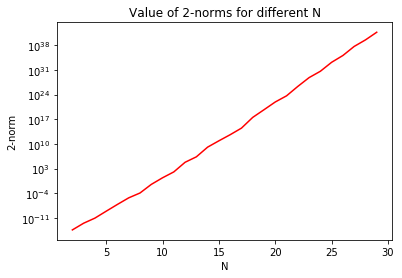

In [8]:
import matplotlib.pylab as plt
plt.semilogy(all_N,all_norms,'r',label='2-norms')
plt.title("Value of 2-norms for different N")
plt.xlabel("N")
plt.ylabel("2-norm")
plt.show();

The value of 2-norm for $N=5$ is low, however, as $N$ increases, the 2-norm increases exponentially.